In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EV Dataset Analysis
## Will EV be the choice of car for consumers in the foreseable future?


In the last couple of years we have seen an uptake of EVs by consumers, in this analysis I want to focus in why we have seen the uptake and if the trend is going to continue given the change in the market higher interest rates, increasing energy prices...

All the data in this analysis comes from public data, see links below:
- New vehicle registrations:


In [23]:
veh_reg=pd.read_csv('vehicle_registration_2014Q3_2023Q2.csv')

In [24]:
veh_reg.head()

,BodyType,Make,GenModel,Model,Fuel,2023Q2,2023Q1,2022Q4,2022Q3,2022Q2,...,2016Q4,2016Q3,2016Q2,2016Q1,2015Q4,2015Q3,2015Q2,2015Q1,2014Q4,2014Q3
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,0,0,0,0,0,...,59,100,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,0,0,0,0,0,...,10,26,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
veh_reg.shape

(53195, 41)

In [67]:
pd.melt(veh_reg,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915020 entries, 0 to 1915019
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   BodyType      object
 1   Make          object
 2   GenModel      object
 3   Model         object
 4   Fuel          object
 5   YearQuarter   object
 6   Registration  int64 
dtypes: int64(1), object(6)
memory usage: 102.3+ MB


In [26]:
pd.melt(veh_reg,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration').groupby(['BodyType'])['Registration'].sum()

BodyType
Buses and coaches          65379
Cars                    19847035
Heavy goods vehicles      437870
Light goods vehicles     3188722
Motorcycles              1103981
Other vehicles            494821
Name: Registration, dtype: int64

In [27]:
cars_data=veh_reg.copy()
cars_data=pd.melt(cars_data,id_vars=['BodyType','Make','GenModel','Model','Fuel'],
        var_name='YearQuarter',value_name='Registration')
cars_data=cars_data[cars_data['BodyType']=='Cars']
cars_data['Year']=cars_data['YearQuarter'].astype(str).str[:4]
cars_data['Quarter']=cars_data['YearQuarter'].astype(str).str[-2:]
cars_data.loc[cars_data['Fuel'].isin(['Gas','Range extended electric','Fuel cell electric']),'Fuel']='Other fuel types'
cars_data.loc[cars_data['Fuel'].isin(['Hybrid electric (diesel)','Hybrid electric (petrol)']),'Fuel']='Hybrid'
cars_data.loc[cars_data['Fuel'].isin(['Plug-in hybrid electric (diesel)','Plug-in hybrid electric (petrol)']),'Fuel']='Plug-in hybrid'
cars_data.head(10)

,BodyType,Make,GenModel,Model,Fuel,YearQuarter,Registration,Year,Quarter
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,2023Q2,0,2023,Q2
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,2023Q2,0,2023,Q2
2,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,2023Q2,0,2023,Q2
3,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR AUTO,Petrol,2023Q2,0,2023,Q2
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER SCORPIONE MULTIAIR,Petrol,2023Q2,0,2023,Q2
5,Cars,ABARTH,ABARTH 500,500,Petrol,2023Q2,0,2023,Q2
6,Cars,ABARTH,ABARTH 500,500 C,Petrol,2023Q2,0,2023,Q2
7,Cars,ABARTH,ABARTH 500,500 CUSTOM,Petrol,2023Q2,0,2023,Q2
8,Cars,ABARTH,ABARTH 500,500 CUSTOM S-A,Petrol,2023Q2,0,2023,Q2
9,Cars,ABARTH,ABARTH 500,500 S-A,Petrol,2023Q2,0,2023,Q2


In [28]:
fuel_registration=cars_data.groupby(['Fuel','Year'])['Registration'].sum().reset_index(['Fuel','Year'])
fuel_registration=fuel_registration[~fuel_registration['Year'].isin(['2014','2023'])]


In [29]:
total_reg_year=fuel_registration.groupby(['Year'])['Registration'].sum().reset_index(['Year'])
total_reg_year.rename(columns={'Registration':'TotalRegistrations'},inplace=True)
total_reg_year

,Year,TotalRegistrations
0,2015,2661020
1,2016,2723774
2,2017,2564330
3,2018,2394042
4,2019,2346576
5,2020,1656403
6,2021,1677245
7,2022,1652128


In [71]:
years=total_reg_year['Year'].to_list()
market_share=pd.merge(fuel_registration,total_reg_year,how='left',on='Year')
market_share['MarketShare']= market_share['Registration']*100/market_share['TotalRegistrations']
market_share.head(10)

,Fuel,Year,Registration,TotalRegistrations,MarketShare
0,Battery electric,2015,10091,2661020,0.379215
1,Battery electric,2016,10429,2723774,0.382888
2,Battery electric,2017,13913,2564330,0.542559
3,Battery electric,2018,15756,2394042,0.658134
4,Battery electric,2019,38007,2346576,1.619679
5,Battery electric,2020,107913,1656403,6.514900
6,Battery electric,2021,190420,1677245,11.353142
7,Battery electric,2022,266875,1652128,16.153409
8,Diesel,2015,1284010,2661020,48.252550
9,Diesel,2016,1293690,2723774,47.496231


In [31]:
# Create function to create palettes for my graphs
def custom_palette(df,colours,hue):
    hue_values=sorted(df[hue].unique())
    colours=colours
    colour_palette={}
    if abs(len(hue_values)-len(colours))>0:
        raise Exception(f'Length of colours and categories must match: Colour lenght is {len(colours)}, category length is {len (hue_values)}')
    else:
        for colour,hue in zip(colours,hue_values):
            colour_palette[hue]=colour
        return colour_palette


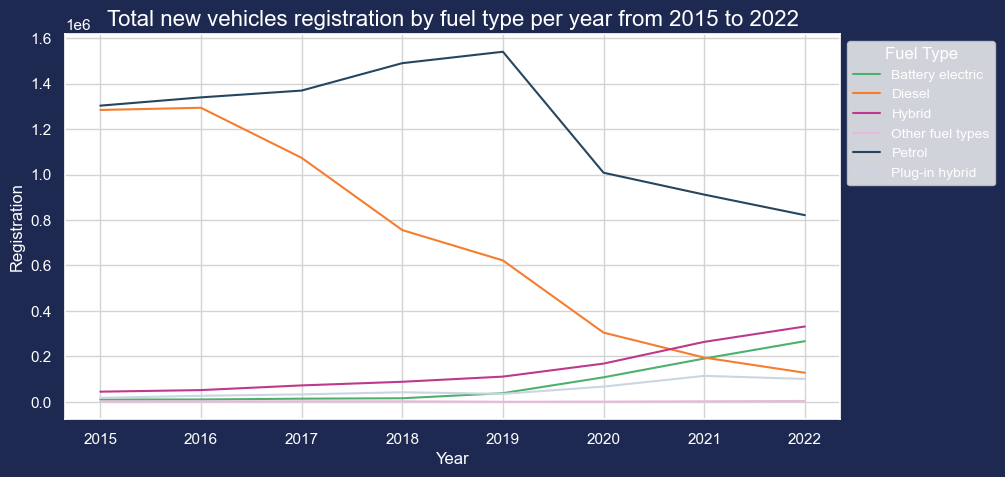

In [74]:
#Set the palette for the graphs
colours=['#4fb06d','#F77d2e','#BE398D','#EBB8DD','#26465f','#CBD6E2']
new_palette=custom_palette(market_share,colours,hue='Fuel')
sns.set(rc={'figure.facecolor':'#1d2951','axes.facecolor':'white','text.color':'white','axes.labelcolor':'white',
            'xtick.color':'white','ytick.color':'white','grid.color':'lightgrey'})
plt.figure(figsize=(10,5))
plt.title('Total new vehicles registration by fuel type per year from 2015 to 2022',size=16);
ax=sns.lineplot(data=fuel_registration,x='Year',y='Registration',hue='Fuel',hue_order=sorted(market_share['Fuel'].unique()),
                errorbar=None,palette=new_palette)
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=10, bbox_to_anchor=(1, 1))

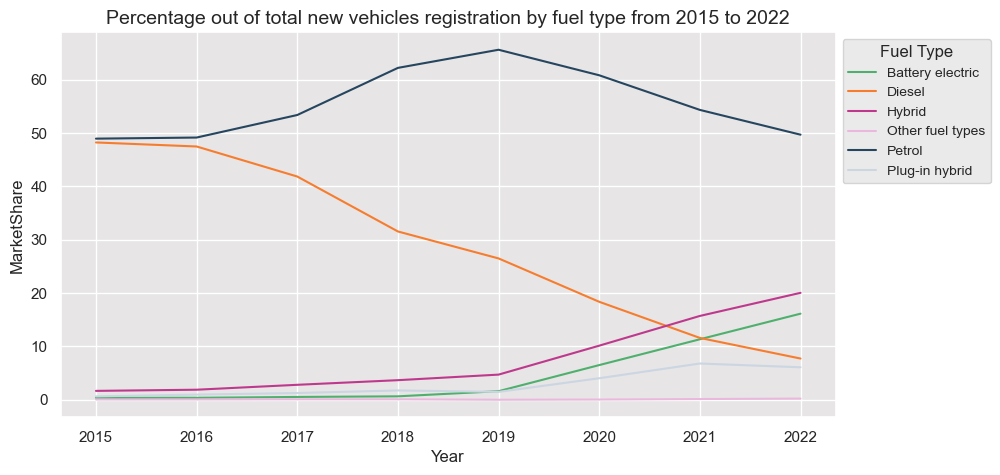

In [73]:
plt.figure(figsize=(10,5));
plt.title('Percentage out of total new vehicles registration by fuel type from 2015 to 2022',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.lineplot(data=market_share,x='Year',y='MarketShare',hue='Fuel',errorbar=None,hue_order=sorted(market_share['Fuel'].unique()),
                palette=new_palette)
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=10, bbox_to_anchor=(1, 1))


In [89]:
quarter_change=cars_data.groupby(['Fuel','Year'])['Registration'].sum().reset_index(['Fuel','Year'])
fuel_type=quarter_change['Fuel'].unique()
for fuel in fuel_type:
    quarter_change.loc[quarter_change['Fuel']==fuel,'YoY']=quarter_change.loc[quarter_change['Fuel']==fuel,'Registration'].diff()

quarter_change['YoY']=quarter_change['YoY']*100/quarter_change['Registration']
quarters=sorted(quarter_change['Year'].unique())
quarter_change=quarter_change[~quarter_change['Year'].isin(['2014','2023'])]
quarter_change=quarter_change[quarter_change['Fuel'].isin(['Battery electric','Hybrid'])]

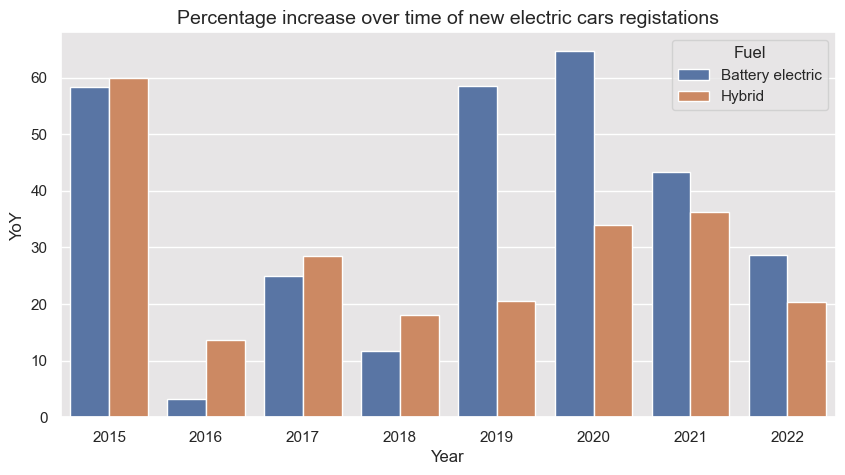

In [91]:
plt.figure(figsize=(10,5));
plt.title('Percentage increase over time of new electric cars registations',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.barplot(data=quarter_change,x='Year',y='YoY',hue='Fuel')

# Graveyard
## Sample code to be deleted at the end

In [ ]:
quarter_change=cars_data.groupby(['Fuel','YearQuarter'])['Registration'].sum().reset_index(['Fuel','YearQuarter'])
fuel_type=quarter_change['Fuel'].unique()
for fuel in fuel_type:
    quarter_change.loc[quarter_change['Fuel']==fuel,'QoQ']=quarter_change.loc[quarter_change['Fuel']==fuel,'Registration'].diff()

quarter_change['QoQ']=quarter_change['QoQ']*100/quarter_change['Registration']
quarters=sorted(quarter_change['YearQuarter'].unique())
quarter_change=quarter_change[quarter_change['YearQuarter'].isin(quarters[-14:])]
 #   for quarter in quarters:

In [ ]:
plt.figure(figsize=(10,5));
plt.title('Change by quarter over time of new cars registations by fuel type',size=14)
sns.set(rc={'figure.facecolor':'white','axes.facecolor':'#e7e5e6'})
ax=sns.lineplot(data=quarter_change,x='YearQuarter',y='Registration',hue='Fuel',errorbar=None,hue_order=sorted(market_share['Fuel'].unique()),
                palette=new_palette)
sns.move_legend(ax, "upper left",title='Fuel Type',fontsize=8, bbox_to_anchor=(1, 1))